In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import matplotlib.ticker as ticker
from cycler import cycle

from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LightSource

%matplotlib inline

Ths using matplotlibrc file from 
https://github.com/mpmdean/matplotlibrc
All fields are using latex by default -- this avoid non-uniformity when using latex in some labels. 

In [2]:
import sys
print("Python version is {} \n".format(sys.version))
print("Matplotlib version is {} \n".format(mpl.__version__))
print("Matplotlibrc file is {}\n".format(mpl.matplotlib_fname()))

Python version is 3.10.6 | packaged by conda-forge | (main, Aug 22 2022, 20:36:39) [GCC 10.4.0] 

Matplotlib version is 3.6.0 

Matplotlibrc file is matplotlibrc



## Make fake data

In [3]:
qx = np.linspace(-np.pi, np.pi, 50)
qy = np.linspace(-np.pi, np.pi, 50)
QX, QY = np.meshgrid(qx, qy)

B = 0.5* (np.cos(QX) + np.cos(QY))

E = np.sqrt(1-B**2)

## Labels need to be moved

In [4]:
mpl.rcParams['xtick.major.pad'] = 0 
mpl.rcParams['ytick.major.pad'] = 0 
mpl.rcParams['axes.labelpad'] = 0 

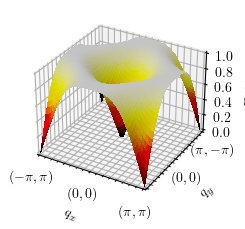

In [5]:
fig, ax = plt.subplots(figsize=(3+3/8, 2.5), subplot_kw=dict(projection='3d'))

# create light source object.
ls = LightSource(azdeg=0, altdeg=25)
# shade data, creating an rgb array.
shade = ls.shade(E, plt.cm.hot)
surf = ax.plot_surface(QX, QY, E, rstride=1, cstride=1, linewidth=0,
                       antialiased=False, facecolors=shade)


ax.axis([-np.pi, np.pi, -np.pi, np.pi])

ax.set_xticks(np.linspace(-np.pi, np.pi, 5))
ax.set_xticklabels(['$(-\pi, \pi)$', '', '$(0, 0)$', '', '$(\pi, \pi)$'])
ax.set_yticks(np.linspace(-np.pi, np.pi, 5))
ax.set_yticklabels(['', '', '$(0, 0)$', '', '$(\pi, -\pi)$'])

ax.set_zticks(np.linspace(0, 1, 6))

ax.set_xlabel('$q_x$')
ax.set_ylabel('$q_y$')
ax.set_zlabel('E (eV)')

fig.savefig('ex_03_surface.pdf', dpi=1200)